# Decision Tree

트리 구조를 사용하고, 각 분기점에는 분석 대상의 특성들이 위치

분기점마다 목표 값을 가장 잘 분류할 수 있는 특성을 찾아 배치, 해당 특성이 갖는 값을 이용해 새로운 가지를 만듬

In [2]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Breast Cancer 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df =pd.read_csv(uci_path, header=None)

In [6]:
df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleoli','mitoses','class']

In [7]:
print(df.shape)

(699, 11)


In [8]:
df.sample(5)

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
125,1176406,1,1,1,1,2,1,2,1,1,2
618,1061990,4,1,1,1,2,1,2,1,1,2
643,1294413,1,1,1,1,2,1,1,1,1,2
81,1143978,4,1,1,2,2,1,2,1,1,2
619,1073836,5,1,1,1,2,1,2,1,1,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [10]:
df.isnull().sum()

,0
id,0
clump,0
cell_size,0
cell_shape,0
adhesion,0
epithlial,0
bare_nuclei,0
chromatin,0
normal_nucleoli,0
mitoses,0


In [11]:
# 중복데이터 확인
df.duplicated().sum()

np.int64(8)

In [12]:
# 목표 변수
# 목표 변수(클래스)가 불균형한지, 고르게 분포했는지 확인하기 위해
df['class'].value_counts(normalize=True)

,proportion
class,
2,0.655222
4,0.344778


In [13]:
# 목표 변수를 이진 변수로 변환 - 2: benign(양성), 4:malignant(악성)
# 2->0, 4->1 로 변환
df['class'] = df['class'].map({2:0, 4:1})
df['class'].value_counts(normalize=True)

,proportion
class,
0,0.655222
1,0.344778


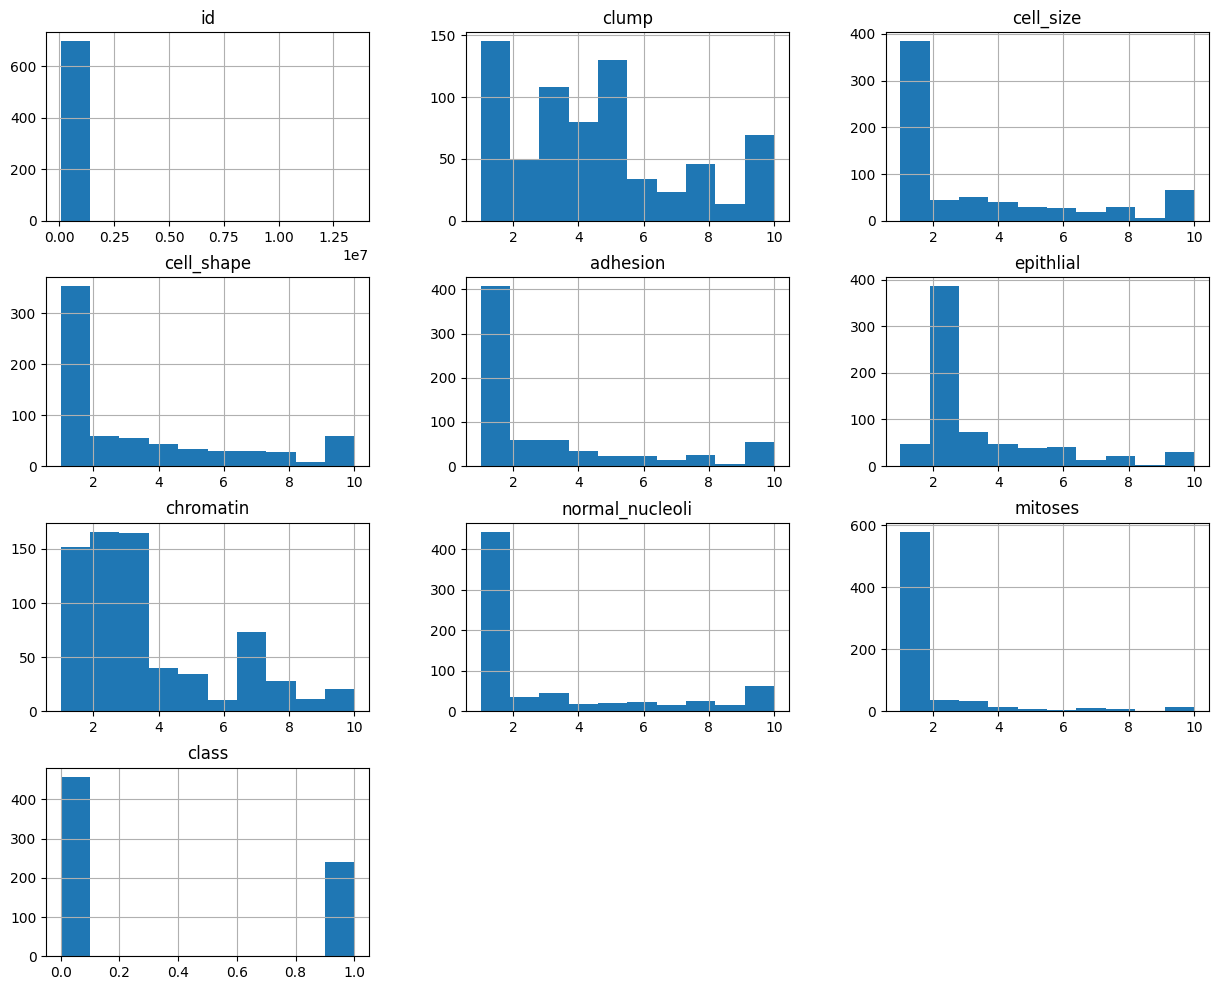

In [14]:
# pandas hist 시각화
df.hist(figsize=(15,12));

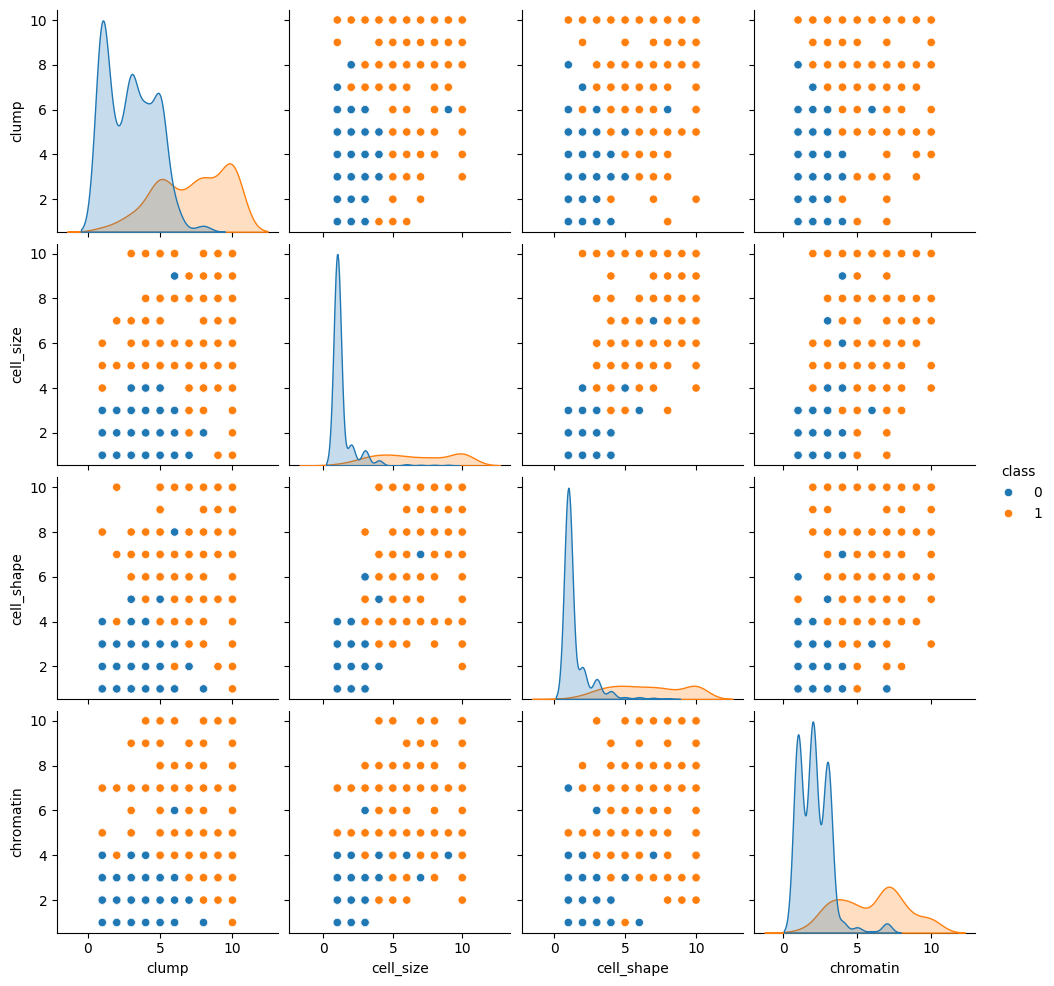

In [15]:
# seaborn pairplot 시각화
vis_cols = ['clump','cell_size','cell_shape','chromatin','class']
sns.pairplot(data=df[vis_cols], hue='class');

In [16]:
# 중복 데이터 제거
print('중복 제거 이전:', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후:', df.shape)

중복 제거 이전: (699, 11)
중복 제거 이후: (691, 11)


In [18]:
# bare_nuclei 열의 자료형 변경 (문자열->숫자)
# bare_nuclei 열의 고유값 확인
print('bare_nuclei 열의 고유값:', df['bare_nuclei'].unique())

df['bare_nuclei'] = df['bare_nuclei'].replace('?',np.nan) # ?을 np.nan으로 변경
df = df.dropna(subset=['bare_nuclei'], axis=0) # 누락 데이터 행 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int') # 문자열을 숫자형으로 변경

# 데이터 통계 요약정보 확인
df.describe()

bare_nuclei 열의 고유값: [ 1 10  2  4  3  9  7  5  8  6]


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,0.349630
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.477207
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [23]:
# 속성 변수 선택
train_features = ['clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleoli','mitoses']
X = df[train_features] # 설명 변수 X
y = df['class'] # 예측 변수 x

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=10)

print('train data의 개수:', X_train.shape)
print('test data의 개수:', X_test.shape)

train data의 개수: (472, 9)
test data의 개수: (203, 9)


# 모델 학습 및 검증

In [24]:
# 모형 객체 생성
tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 1 0 0 1 1 0 0 1]
[0 1 1 0 0 1 1 0 0 1]


In [25]:
# 모델 성능 평가 - Confusion Matrix 계산
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

[[126   4]
 [  2  71]]


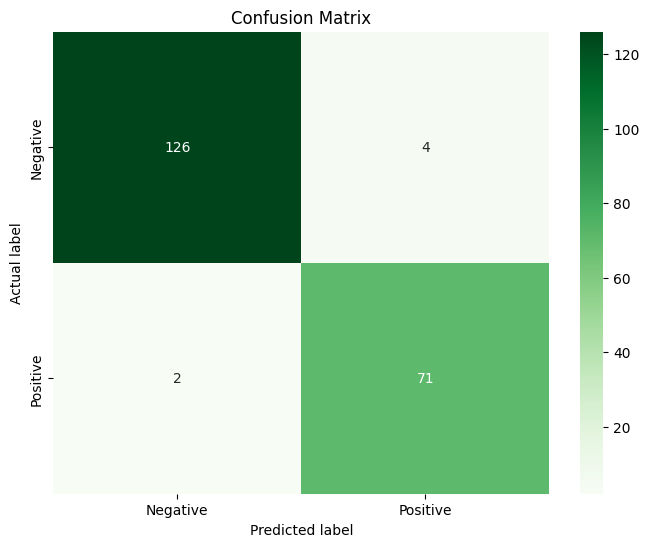

In [26]:
# confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test,y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       130
           1       0.95      0.97      0.96        73

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



In [29]:
# 특성 중요도 계산
features = pd.DataFrame(tree_model.feature_importances_,
                        index=train_features,
                        columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)
features

,Importance
cell_size,0.707854
bare_nuclei,0.128394
clump,0.096517
epithlial,0.017665
chromatin,0.016317
adhesion,0.014764
normal_nucleoli,0.011798
mitoses,0.006691
cell_shape,0.000000
